C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


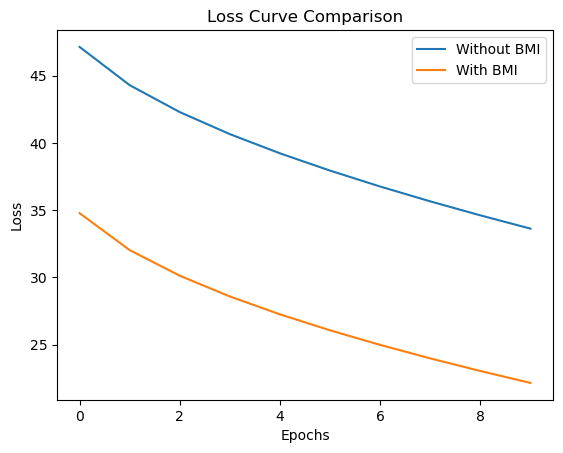

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

# Step 1: Define dataset with and without BMI
X = np.array([[5, 10, 30, 1]])  # height, weight, age, smoking
y = np.array([20])  # Target value
BMI = X[:, 1] / (X[:, 0] ** 2)  # Compute BMI
X_with_BMI = np.hstack((X, BMI.reshape(-1, 1)))

# Step 2: Define feedforward network
def create_model(input_dim):
    model = keras.Sequential([
        layers.Dense(2, activation='relu', input_shape=(input_dim,)),
        layers.Dense(1)  # No activation
    ])
    return model

# Step 3: Compile model with RMSprop and MSE loss
def compile_and_train(X_train, y_train, epochs=10):
    model = create_model(X_train.shape[1])
    model.compile(optimizer='rmsprop', loss='mse')
    history = model.fit(X_train, y_train, epochs=epochs, verbose=0)
    return history

# Step 4: Train model and plot loss
history_no_BMI = compile_and_train(X, y)
history_with_BMI = compile_and_train(X_with_BMI, y)

def plot_loss_curve(history, label):
    plt.plot(history.history['loss'], label=label)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

plt.figure()
plot_loss_curve(history_no_BMI, 'Without BMI')
plot_loss_curve(history_with_BMI, 'With BMI')
plt.title('Loss Curve Comparison')
plt.show()

# Step 5: Observe inability to capture BMI-like nonlinearity without explicit input
